# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

We start with a generative model:

$$
X \sim U(10,20)
$$

$$
Y \sim mX + b + N(0,\sigma^2)
$$

"Uniform Distribution"

Here are the input parameters we are going to use for this model.

In [3]:
m = 0.75
b = 3.5
sigma = 0.5

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `X` and `Y`:

In [4]:
def fY(X, m, b, sigma):
    return m*X+b+np.random.normal(0,sigma**2)

In [5]:

X = np.array(np.random.uniform(10,20,50))
Y = np.array(fY(X, m, b, sigma))
print (X)
print (Y)

[ 11.36959354  13.75944616  15.89779846  13.82137836  12.43217963
  19.05566256  15.04059603  19.41346588  18.42933831  11.41114521
  10.99718752  18.57009942  11.14697859  11.59634623  19.94300879
  15.43257515  12.84232673  15.00274498  12.85517165  12.41856479
  17.77048537  12.74481307  16.34110364  15.03113189  15.07052676
  11.44295821  15.20096014  14.7776184   17.18858138  14.66726859
  14.53183613  16.70176975  11.17369813  17.33638318  13.86231981
  11.64312362  19.91946763  11.83094916  14.70525845  10.42723308
  14.66023051  11.69590124  14.37819546  16.07098931  18.02575496
  18.00662059  17.51429524  13.17910091  18.08379956  11.31052093]
[ 11.89752034  13.68990981  15.29367403  13.73635895  12.6944599
  17.6620721   14.65077221  17.93042459  17.19232892  11.92868409
  11.61821582  17.29789975  11.73055913  12.06758486  18.32758177
  14.94475654  13.00207023  14.62238392  13.01170392  12.68424878
  16.69818921  12.92893499  15.62615292  14.6436741   14.67322025
  11.95254

Make an appropriately labeled scatter plot of the `X` and `Y` data:

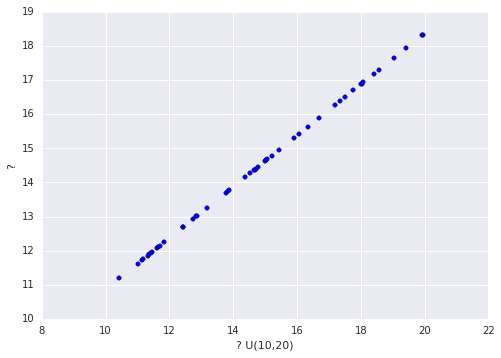

In [6]:
plt.scatter(X,Y)
plt.xlabel("? U(10,20)")
plt.ylabel("?")

In [7]:
from scipy.optimize import curve_fit

Write a function `fit`, that uses `curve_fit` and returns a fitted `(slope, intercept)` for the `X` and `Y` data above.

In [9]:
curve_fit(fY,X,Y)

/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:601: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 0.75      ,  0.76466327,  1.39523381]), array([[ inf,  inf,  inf],
        [ inf,  inf,  inf],
        [ inf,  inf,  inf]]))

In [ ]:
def fit(X, Y):
    """Fit X and Y data to the model Y ~ m*X + b and return (m,b)"""
    return curve_fit(fY,X,Y)

In [ ]:
m, b = fit([0,1,2], [0,1,2])
assert abs(m-1.0)<0.01
assert abs(b-0.0)<0.01

Write a function, `bootstrap`, that can create boostrapped versions of the `X` and `Y` arrays above. It is important that you bootstrap pairs of `X[i],Y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [18]:
def bootstrap_data(data):
    """Perform a single boostrap resampling of the input data array."""
    return np.array( [data[np.random.randint(0,len(data)-1)] for r in range(len(data))] )

In [22]:
def bootstrap(X, Y):
    """Return boostrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    X: ndarray
        Input X array.
    Y: ndarray
    
    Returns
    -------
    XX: ndarray
        The boostrapped X array with the same shape as X and correlated random samples
        drawn with replacement.
    YY: ndarray
        The bootstrapped Y array with the same shape as Y and correlated random samples
        drawn with replacement.
    """
    original = [[x, y] for x, y in zip(X, Y)]
    print (original)
    result = []
    for sample in range(len(original)):
        resample = bootstrap_data(original)
        result.append(resample)
    return np.array(result)

In [23]:
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
bootstrap(a, b)

[[0, 4], [1, 5], [2, 6], [3, 7]]


array([[[2, 6],
        [0, 4],
        [1, 5],
        [2, 6]],

       [[0, 4],
        [1, 5],
        [0, 4],
        [2, 6]],

       [[1, 5],
        [2, 6],
        [1, 5],
        [0, 4]],

       [[0, 4],
        [1, 5],
        [1, 5],
        [2, 6]]])

In [ ]:
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [ ]:
def bootstrap_fit(X, Y, n):
    """Fit a straight line to X and Y n times using bootstrapping.
    
    Returns
    -------
    (m, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the slope and intercept.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

Using the original `X` and `Y` data above:

* Find the bootstrapped slopes and intercepts (bootstrap 100 times).
* Make an appropriately labeled `jointplot` of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()